### 앙상블 학습 (Ensemble Learning)
- 어떤 데이터의 값을 예측한다고 할 때, 하나의 모델만 가지고도 결과를 도출할 수 있지만,  
  여러 개의 모델을 조화롭게 학습시켜 그 모델들의 예측 결과들을 이용하면 더 정확한 예측값을 구할 수 있다.
- 여러 개의 분류기를 생성하고 그 예측을 결합시켜 1개의 분류기를 사용할 때보다 더 정확하고 신뢰성 높은 예측을 도출하는 기법이다.
- 강력한 하나의 모델을 사용하는 것보다 약한 모델 여러 개를 조합하여 더 정확한 예측에 도움을 주는 방식이다.
- 앙상블 학습의 주요 방법은 배깅(Bagging)과 부스팅(Boosting)이다.

#### 보팅(Voting)
- 하나의 데이터 세트에 대해 서로 다른 알고리즘을 가진 분류기를 결합하는 방식이다.
- 서로 다른 분류기들에 "동일한 데이터 세트"를 병렬로 학습해서 예측값을 도출하고,  
  이를 합산하여 최종 예측값을 산출해내는 방식을 말한다.

> 1. 하드 보팅 (Hard Voting)
> - 각 분류기가 만든 예측값을 다수결로 투표해서 가장 많은 표를 얻은 예측값을 최종 예측값으로 결정하는 보팅 방식을 의미한다.
>
> <img src="./images/hard_voting.png" width="420px">

> 2. 소프트 보팅 (Soft Voting)
> - 각 분류기가 예측한 타겟별 확률의 평균을 구한 뒤,가장 높은 확률을 가진 타겟을 최종 예측값으로 도출한다.
>
> <img src="./images/soft_voting.png" width="440px">

#### 배깅 (Bagging, Bootstrap Aggregation)
- 하나의 데이터 세트에서 "여러 번의 중복을 허용하면서 학습 데이터 세트를 랜덤하게 뽑은 다음(Bootstrap)"  
  하나의 예측기 여러 개를 병렬로 학습시켜서 결과물을 집계(Aggregation)하는 방법이다.
- Voting 방식과는 달리, 같은 알고리즘의 분류기를 사용하고  
  훈련 세트를 무작위로 구성하여 각기 다르게(독립적으로, 병렬로) 학습시킨다.
- 학습 데이터가 충분하지 않더라도 충분한 학습효과를 주기 때문에, 과적합 등의 문제를 해결하는 데 도움을 준다.
- 배깅 방식을 사용한 대표적인 알고리즘이 바로 랜덤 포레스트(Random Forest) 알고리즘이다.

<img src='./images/voting_bagging.png' width='600px'>

#### 부스팅 (Boosting)
- 이전 분류기의 학습 결과를 토대로 다음 분류기으 학습 데이터의 샘플 가중치를 조절해서 "순차적으로" 학습을 진행하는 방법이다.
- 이전 분류기를 계속 개선해나가는 방향으로 학습이 진행되고, 오답에 대한 높은 가중치를 부여하므로 정확도가 높게 나타난다.
- 높은 가중치를 부여하기 때문에 이상치(Outlier)에 취약할 수 있다.

<img src='./images/boosting01.png' width='600px' style='margin-top: 20px;'>

> 1. Adaboost (Adaptive Boosting)
> - 부스팅에서 가장 기본이 되는 기법으로, 결정 트리와 유사한 알고리즘을 사용하지만  
뻗어나가지(tree) 않고 하나의 조건식(stump)만 사용하여 결정한다.  
> - 여러 개의 stump로 구성되어있으며, 이를 Forest of stumps 라고 한다.  
> - stump는 조건식 한 개와 두 갈래의 참, 거짓 리프 노드가 있는 형태이다.  
> - tree와는 다르게, stump는 단 하나의 질문으로 데이터를 분류해야 하기 때문에 약한 학습기(weak learner)이다.  
>
> <img src='./images/boosting02.png' width='400px'>
>
> - 결과에 미치는 영향이 큰 stump를 Amount of Say가 높다(가중치가 높다)고 한다.  
> - 각 stump의 에러는 다음 stump의 결과에 영향을 미치고, 이는 마지막 stump까지 줄줄이 이어진다.  
> - 모든 stump의 Amount of Say 수치를 구한 뒤 함치면, Total Amount of Say가 나오고 이를 통해 최종 분류한다.  
> - stump 하나는 약한 학습기지만, 모이면 강한 학습기로 작용한다.  
>
> <img src='./images/amount_of_say.png' width='300px'>
>
> - Total Error가 0이면 항상 올바른 분류를 한다는 것이고, 항상 1이면 항상 반대로 분류를 한다는 의미다.  
> - 하지만 만약 Total Error가 0.5라면, Amount of Say는 0이 된다.  
이는 확률이 반반이라는 의미이며, 해당 분류기는 분류 결과를 랜덤으로 판단한다.


> 2. GBM (Gradient Boost Machine)
> - Adaboost와 유사하지만, 에러를 최소화하기 위해 가중치를 업데이터 할 때 경사 하강법(Gradient Descent)을 이용한다.
> - GBM은 과적합에도 매우 하고 뛰어난 성능을 보이지만, 병렬 처리가 되지 않기 때문에 수행 시간이 오래 걸린다는 단점이 있다.
> - 경사 하강법이란, 오류를 최소화하기 위해 Loss Function의 최소값까지 점차 하강하면서 찾아나가는 기법이다.
> - 모델 A를 통해 y를 예측하고 남은 잔차(residual, 에러의 비율)를 B라는 모델로 다시 예측하고,  
A + B 모델을 통해 y를 예측하는 방식이다.
> - 잔차를 계속 줄여나가며 훈련 데이터 세트를 잘 예측하는 모델을 만들 수 있게 된다.
> - 잔차를 계속 줄이다보면 복잡도가 증가하기 때문에, 과적합이 일어날 수도 있다는 단점이 있다.
>
> <img src='./images/gradient_boosting.png' width='700px'>


> 3. XGBoost (Extra Gradient Boost)
> - 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나이며,  
분류에 있어서 일반적으로 다른 머신 러닝보다 뛔어난 예측 성능을 나타낸다.
> - GBM 기반이지만 병렬 CPU 환경에서 병렬 학습이 가능하기 때문에, 기존 GBM보다 빠르게 학습을 완료할 수 있다.
> - 하이퍼 파라미터를 조정하여 분할 깊이를 변경할 수 있지만,  
tree pruning(가지치기)으로 더 이상 긍정 이득이 없는 분할을 가지치기하여 분할 수를 줄이는 추가적인 장점도 가지고 있다.
>
> <img src='./images/xgboost.png' width='900px'>
>
> - 조기 중단 기능(Early Stopping)은 특정 반복 횟수만큼  
더 이상 Loss Function이 감소하지 않으면 수행을 종료할 수 있는 기능이다.  
> - 학습 시간을 단축시킬 수 있으며, 이는 최적화 튜닝 시 적절하게 사용 가능하다.  
> - 하지만 반복 횟수를 너무 낮게 설정하면 최적화되기 전에 학습이 종료될 수 있기 때문에 주의가 필요하다.
>
> <img src='./images/early_stopping.png' width='400px'>


> 4. LightGBM (Light Gradient Boost Machine)
> - XGBoost의 향상된 버전으로, 결정 트리의 알고리즘을 기반으로  
순위 지정, 분류 및 기타 여러 기계 학습 작업에 사용할 수 있다.
> - 기본 부스팅 방식과 마찬가지로 새로운 분류기가 이전트리의 잔차를 조정해서 모델이 향상되는 방식으로 결합되고,  
마찬가지로 추가된 트리는 각 단계의 결과를 집계하여 강력한 분류기가 될 수 있다.
> - XGBoost와는 달리 GOSS 알고리즘을 호사용해서 수직으로 트리를 성장시킨다.
> - 즉, 알고리즘은 레벨(depth) 단위로 성장시키지만, LightGBM은 리프(leaf) 단위로 성장시킨다.
> - 따로 인코딩 할 필요 없이 카테고리(범주)형 feature를 최적의 형태로 변환하고, 이에 따른 노드 분할을 수행한다.
> - astype("category")으로 변환할 수 있으미, 이는 다른 인코딩 방식들보다 우수하다.
> - GOSS 논문  
>   https://proceedings.neurips.cc/paper_files/paper/2017/file/6449f44a102fde848669bdd9eb6b76fa-Paper.pdf  
>   
> <img src='./images/lightGBM01.png' width='600px'>
>
> <div style="display: flex;">
    <div>
        <img src="./images/lightGBM02.png" width="400px"> 
    </div>
    <div>
        <img src="./images/goss.png" width="300px">  
    </div>
</div>

#### 보팅 (Voting)
**VotingClassifier(n_estimators, voting)**
- n_estimators: 추가할 모델 객체를 list 형태로 전달한다. 각 모델은 튜플 형태로 ('key': model)과 같이 작성한다.
- voting: 'soft', 'hard' 둘 중 선택한다. default는 'hard'

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

c_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
c_df['target'] = cancer.target

c_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [2]:
c_df.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [3]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
c_df.isna().sum().sum()

0

In [10]:
corr = c_df.corr()
corr[['target']].sort_values(by='target', ascending=False)[1:]

,target
smoothness error,0.067016
mean fractal dimension,0.012838
texture error,0.008303
symmetry error,0.006522
fractal dimension error,-0.077972
concavity error,-0.253730
compactness error,-0.292999
worst fractal dimension,-0.323872
mean symmetry,-0.330499
mean smoothness,-0.358560


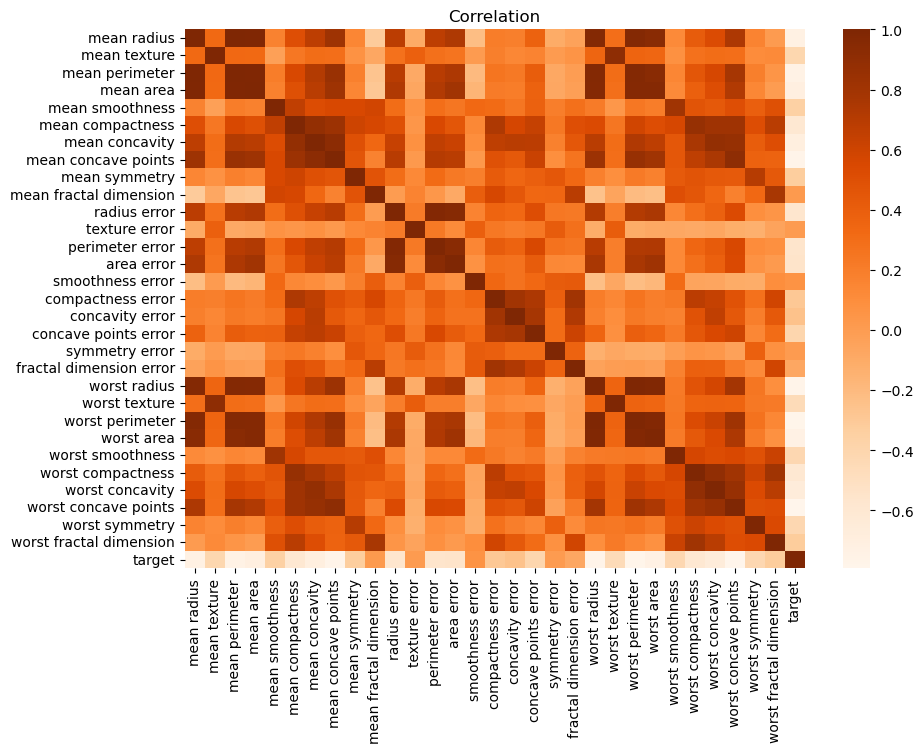

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(corr, cmap="Oranges")
heatmap.set_title("Correlation")
plt.show()

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>,
        <Axes: title={'center': 'mean compactness'}>],
       [<Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>,
        <Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>],
       [<Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>,
        <Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>],
       [<Axes: title={'center': 'symmetry error'}>

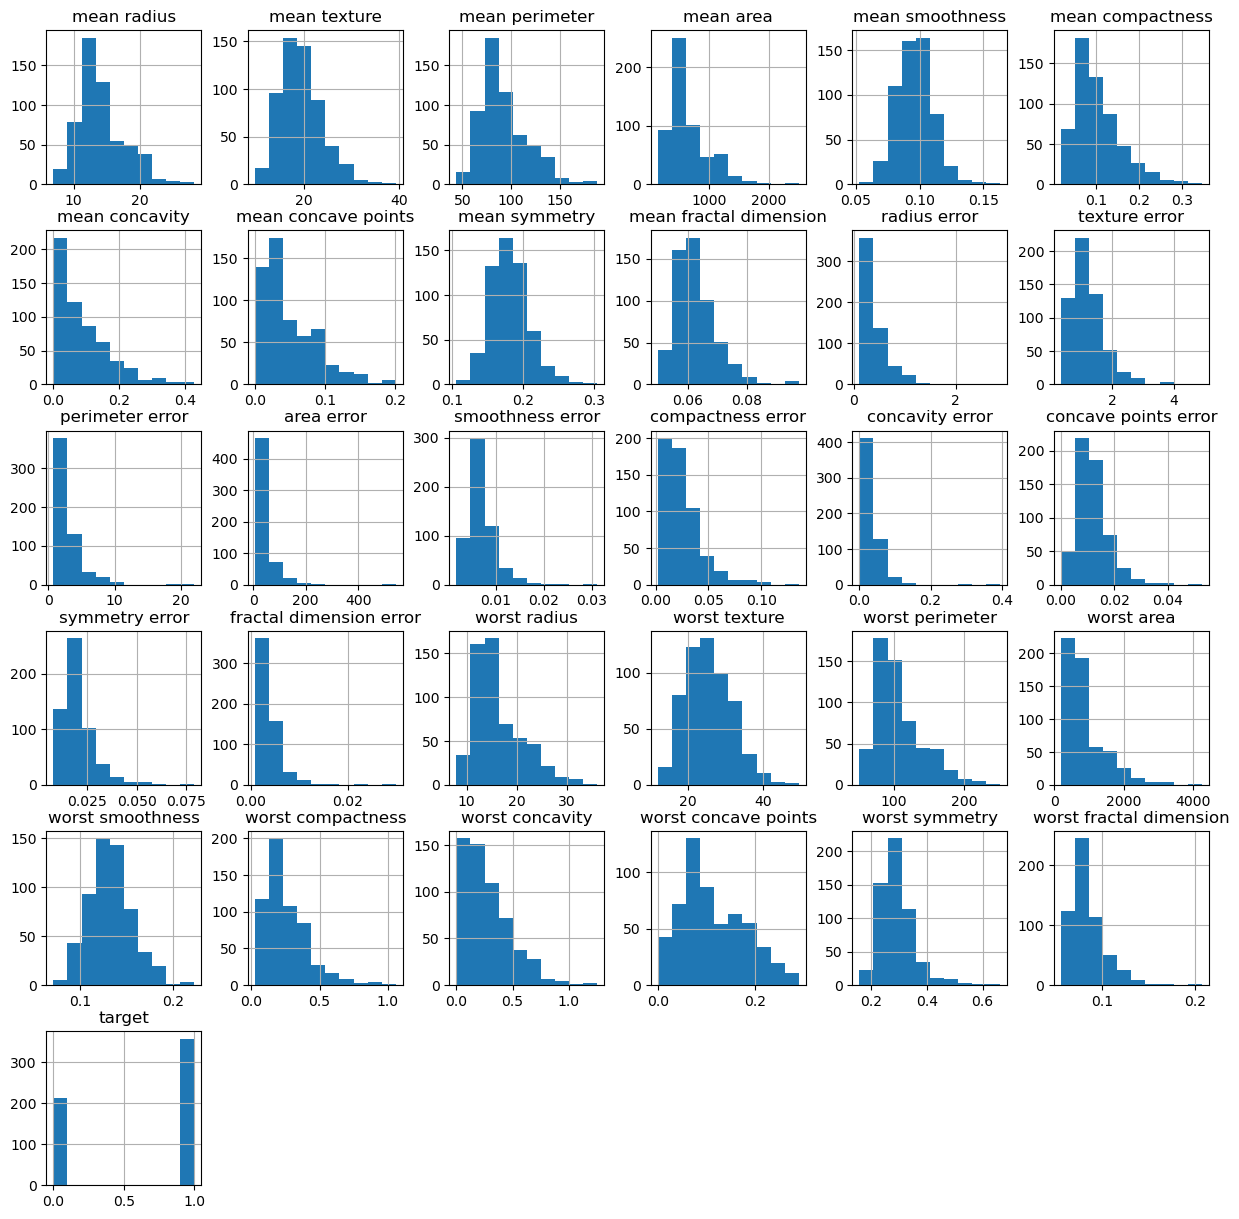

In [13]:
c_df.hist(figsize=(15, 15))

In [17]:
c_df.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

dtc_parameters = {'max_depth': [5, 6, 7], 'min_samples_split': [20, 21, 22]}
svc_parameters = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                 'svc__kernel': ['linear', 'rbf'],}
knn_c_parameters = {'knn__n_neighbors': [3, 5, 7, 9, 11]}

dtc = DecisionTreeClassifier()
svc = SVC(probability=True)
knn = KNeighborsClassifier()

g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True)

knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_c_parameters, cv=5, refit=True, return_train_score=True)

In [30]:
from imblearn.over_sampling import SMOTE

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
                        train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

y_train_over.value_counts()

target
0    285
1    285
Name: count, dtype: int64

In [31]:
print(f'SMOTE 적용 전: \n{y_train.value_counts()}')
print(f'SMOTE 적용 후: \n{y_train_over.value_counts()}')

SMOTE 적용 전: 
target
1    285
0    170
Name: count, dtype: int64
SMOTE 적용 후: 
target
0    285
1    285
Name: count, dtype: int64


In [32]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [20, 21, 22]},
             return_train_score=True)

In [37]:
g_svc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [38]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True)

In [36]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

dtc = g_dtc.best_estimator_

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 20}",0.940351,1
1,"{'max_depth': 5, 'min_samples_split': 21}",0.940351,1
2,"{'max_depth': 5, 'min_samples_split': 22}",0.936842,3
3,"{'max_depth': 6, 'min_samples_split': 20}",0.935088,4
4,"{'max_depth': 6, 'min_samples_split': 21}",0.931579,7
5,"{'max_depth': 6, 'min_samples_split': 22}",0.935088,4
6,"{'max_depth': 7, 'min_samples_split': 20}",0.931579,7
7,"{'max_depth': 7, 'min_samples_split': 21}",0.931579,7
8,"{'max_depth': 7, 'min_samples_split': 22}",0.933333,6


In [43]:
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(svc_result_df['params'][0])
display(svc_result_df)

{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}


,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.942105,40
1,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.761404,56
2,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.942105,40
3,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.919298,47
4,"{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...",0.942105,40
...,...,...,...
67,"{'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...",0.801754,53
68,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.970175,24
69,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.596491,61
70,"{'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...",0.970175,24


In [58]:
from sklearn.preprocessing import StandardScaler

svc = SVC(C=0.001, kernel='linear', probability=True)
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])

svc_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=0.001, kernel='linear', probability=True))])

In [48]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(knn_result_df['params'].iloc[3])
display(knn_result_df)

{'knn__n_neighbors': 9}


,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 3},0.977193,1
1,{'knn__n_neighbors': 5},0.963158,2
2,{'knn__n_neighbors': 7},0.963158,2
3,{'knn__n_neighbors': 9},0.961404,5
4,{'knn__n_neighbors': 11},0.963158,2


In [49]:
knn = KNeighborsClassifier(n_neighbors=9)
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])

knn_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [59]:
from sklearn.ensemble import VotingClassifier

# Hard Voting
# [[39  3]
# [ 6 66]]
# 정확도: 0.9211, 정밀도: 0.9211, 재현율: 0.9211, F1: 0.9211
# vc = VotingClassifier(estimators=[('dtc', dtc),
#                                   ('svc', svc_pipe),
#                                   ('knn', knn_pipe)
#                                  ],
#                       voting='hard',
#                       n_jobs=-1)

# Soft Voting
# [[41  1]
# [ 7 65]]
# 정확도: 0.9298, 정밀도: 0.9298, 재현율: 0.9298, F1: 0.9298
vc = VotingClassifier(estimators=[('dtc', dtc),
                                  ('svc', svc_pipe),
                                  ('knn', knn_pipe)
                                 ],
                      voting='soft',
                      n_jobs=-1)

In [60]:
vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_split=20)),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(C=0.001, kernel='linear',
                                                   probability=True))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=9))]))],
                 n_jobs=-1, voting='soft')

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 정밀도, 재현율, F1 score는 다중 분류에서 각각의 확률값의 평균을 구해서 나타내야 한다.
# 이 때, macro 방식과, micro 방식이 대표적이다.
# macro: 평균을 낸 뒤, 그 평균의 다시 평균을 구하는 방식(샘플 수는 신경쓰지 않는다).
# micro: 샘플 수를 전체 합하고 전체 개수도 전체 합해서 나눠주는 방식(샘플 수를 신경쓴다).
# 타겟 데이터의 비중이 많이 차이난다면, micro방식을 사용하는 것이 바람직하다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='micro')
#     재현율
    recall = recall_score(y_test , prediction, average='micro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='micro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [61]:
prediction = vc.predict(X_test)

오차 행렬
[[41  1]
 [ 7 65]]
정확도: 0.9298, 정밀도: 0.9298, 재현율: 0.9298, F1: 0.9298
################################################################################


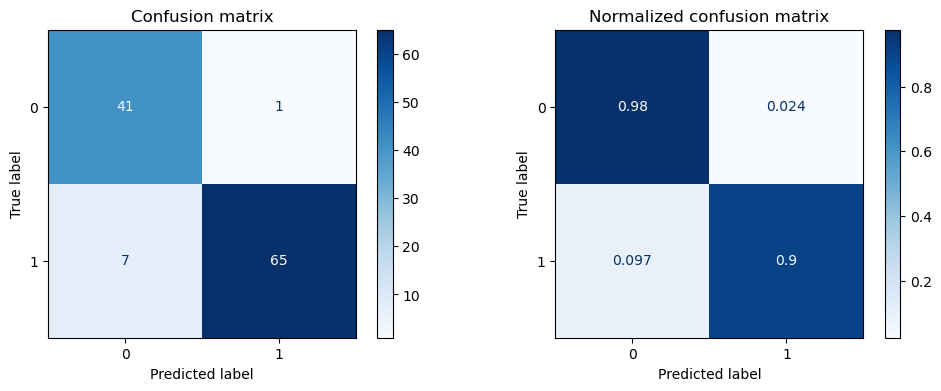

In [62]:
get_evaluation(y_test, prediction, vc, X_test)

#### 배깅 (Bagging) - 랜덤 포레스트 (Random Forest)
**RandomForestClassifier(n_estimators, min_smaples_split, min_samples_leaf, n_jobs)**

- n_estimators: 생성할 tree(모델)의 개수를 작성한다. default는 50

In [64]:
import pandas as pd

car_df = pd.read_csv('./datasets/car.csv')

car_df

,Price,Main_cost,Doors,Persons,Lug_cap,Safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [66]:
pre_c_df = car_df.copy()

In [68]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

# 각 컬럼에 인코더 적용
for column in car_df.columns:
    encoder = LabelEncoder()
    pre_c_df[column] = encoder.fit_transform(car_df[column].tolist())
    encoders[column] = encoder

    print(f'{column}: {encoder.classes_}')

Price: ['high' 'low' 'med' 'vhigh']
Main_cost: ['high' 'low' 'med' 'vhigh']
Doors: ['2' '3' '4' '5more']
Persons: ['2' '4' 'more']
Lug_cap: ['big' 'med' 'small']
Safety: ['high' 'low' 'med']
Decision: ['acc' 'good' 'unacc' 'vgood']


In [70]:
# target 데이터 분포 출력
car_df.Price.value_counts()

Price
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

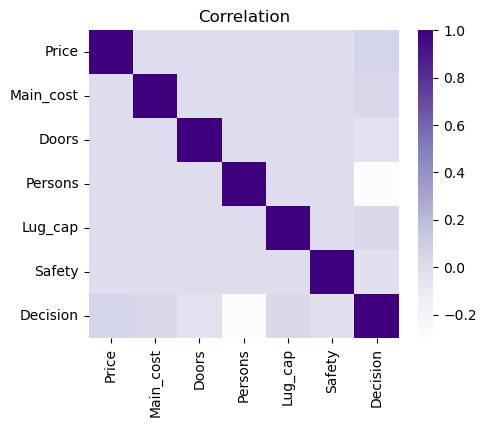

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 4))
corr = pre_c_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Main_cost'}>,
        <Axes: title={'center': 'Doors'}>],
       [<Axes: title={'center': 'Persons'}>,
        <Axes: title={'center': 'Lug_cap'}>,
        <Axes: title={'center': 'Safety'}>],
       [<Axes: title={'center': 'Decision'}>, <Axes: >, <Axes: >]],
      dtype=object)

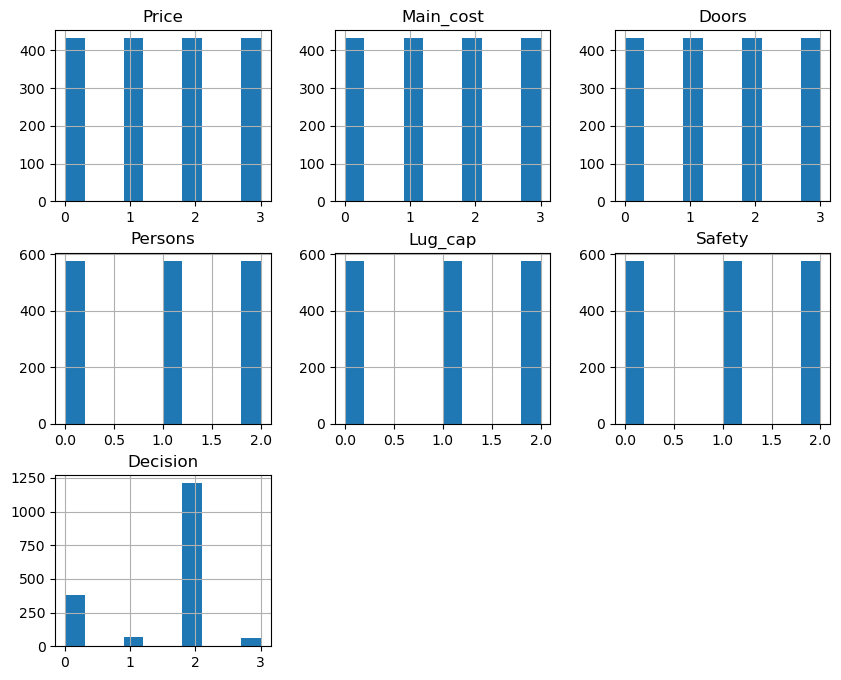

In [74]:
pre_c_df.hist(figsize=(10, 8))

In [85]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'max_depth': [1, 2, 3],
    'min_samples_split': [6, 12, 18, 24]
}

rfc = RandomForestClassifier(n_estimators=100)

features, targets = pre_c_df.iloc[:, 1:], pre_c_df.Price

X_train, X_test, y_train, y_test = \
                    train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=10, n_jobs=-1)
g_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_split': [6, 12, 18, 24]})

In [86]:
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfc_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 6}",0.245981,9
1,"{'max_depth': 1, 'min_samples_split': 12}",0.243129,10
2,"{'max_depth': 1, 'min_samples_split': 18}",0.225023,12
3,"{'max_depth': 1, 'min_samples_split': 24}",0.229366,11
4,"{'max_depth': 2, 'min_samples_split': 6}",0.258326,4
5,"{'max_depth': 2, 'min_samples_split': 12}",0.248181,8
6,"{'max_depth': 2, 'min_samples_split': 18}",0.261923,3
7,"{'max_depth': 2, 'min_samples_split': 24}",0.262652,2
8,"{'max_depth': 3, 'min_samples_split': 6}",0.254723,6
9,"{'max_depth': 3, 'min_samples_split': 12}",0.250339,7


In [87]:
rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 정밀도, 재현율, F1 score는 다중 분류에서 각각의 확률값의 평균을 구해서 나타내야 한다.
# 이 때, macro 방식과, micro 방식이 대표적이다.
# macro: 평균을 낸 뒤, 그 평균의 다시 평균을 구하는 방식(샘플 수는 신경쓰지 않는다).
# micro: 샘플 수를 전체 합하고 전체 개수도 전체 합해서 나눠주는 방식(샘플 수를 신경쓴다).
# 타겟 데이터의 비중이 많이 차이난다면, micro방식을 사용하는 것이 바람직하다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='micro')
#     재현율
    recall = recall_score(y_test , prediction, average='micro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='micro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[ 5  0 24 58]
 [ 8 21 23 34]
 [ 7  9 18 53]
 [18  1 16 51]]
정확도: 0.2746, 정밀도: 0.2746, 재현율: 0.2746, F1: 0.2746
################################################################################


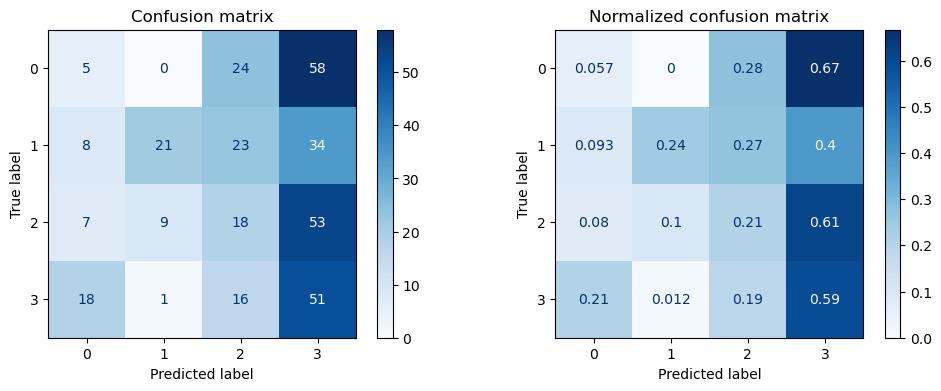

In [90]:
get_evaluation(y_test, prediction, rfc, X_test)

In [92]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(rfc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([5, 0, 3, 2, 1, 4], dtype=int64)

In [94]:
for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

Decision: 0.0682
Main_cost: -0.0044
Lug_cap: -0.0092
Persons: -0.0148
Doors: -0.0171
Safety: -0.0176


#### 1 Cycle의 결과
- Decision feature의 중요도가 그나마 높게 측정되었지만,  
  그 수치도 워낙 작기 때문에 전체적으로 비율을 맞추는 MinMaxScaler()로 스케일링 하기로 한다.

In [95]:
pre_c_df.Decision.value_counts()

Decision
2    1210
0     384
1      69
3      65
Name: count, dtype: int64

In [96]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'rfc__max_depth': [1, 2, 3],
    'rfc__min_samples_split': [6, 12, 18, 24]
}

rfc = RandomForestClassifier(n_estimators=100)

features, targets = pre_c_df.iloc[:, 1:], pre_c_df.Price

X_train, X_test, y_train, y_test = \
                    train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

rfc_pipe = Pipeline([('min_max_scaler', MinMaxScaler()), ('rfc', rfc)])

g_rfc = GridSearchCV(rfc_pipe, param_grid=parameters, cv=10, n_jobs=-1)
g_rfc.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [1, 2, 3],
                         'rfc__min_samples_split': [6, 12, 18, 24]})

In [97]:
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfc_result_df)

,params,mean_test_score,rank_test_score
0,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.233714,11
1,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.240230,10
2,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.240960,9
3,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.212757,12
4,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.272078,1
5,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.264821,5
6,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.264847,4
7,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.265567,2
8,"{'rfc__max_depth': 3, 'rfc__min_samples_split'...",0.264128,6
9,"{'rfc__max_depth': 3, 'rfc__min_samples_split'...",0.259780,7


In [98]:
rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 정밀도, 재현율, F1 score는 다중 분류에서 각각의 확률값의 평균을 구해서 나타내야 한다.
# 이 때, macro 방식과, micro 방식이 대표적이다.
# macro: 평균을 낸 뒤, 그 평균의 다시 평균을 구하는 방식(샘플 수는 신경쓰지 않는다).
# micro: 샘플 수를 전체 합하고 전체 개수도 전체 합해서 나눠주는 방식(샘플 수를 신경쓴다).
# 타겟 데이터의 비중이 많이 차이난다면, micro방식을 사용하는 것이 바람직하다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='micro')
#     재현율
    recall = recall_score(y_test , prediction, average='micro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='micro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[22  0 20 45]
 [25  7 29 25]
 [22  3 20 42]
 [35  0 14 37]]
정확도: 0.2486, 정밀도: 0.2486, 재현율: 0.2486, F1: 0.2486
################################################################################


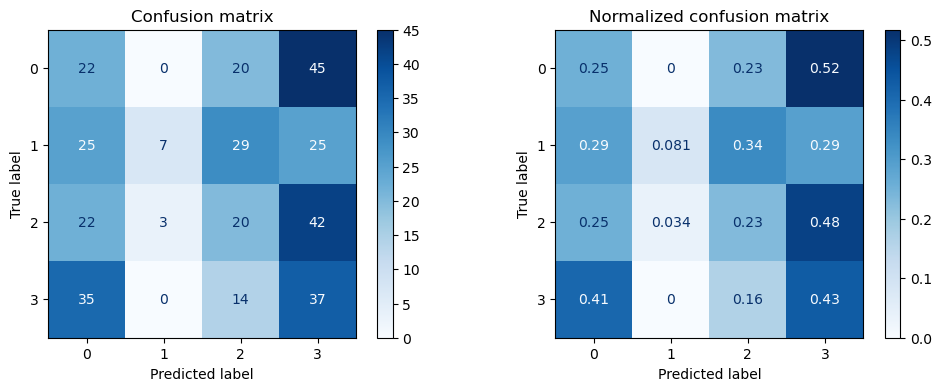

In [101]:
get_evaluation(y_test, prediction, rfc, X_test)

#### Last Cycle 결과
- 전체 데이터에 MinMaxScaler()를 사용하여 스케일링했으며, 그 결과 성능이 소폭 상승했다.
- 하지만 아직 패턴을 분석할 수 있는 데이터가 더 수집되어야 할 것으로 보인다.

#### Adaboost
**AdaBoostClassifier(base_estimators, n_estimators, learning_rate)**

- base_estimators: 학습에 사용하는 알고리즘을 선택한다. default는 DecisionTreeClassifier(max_depth=1)
- n_estimators: 생성할 약한 학습기의 개수를 지정한다. default는 50
- learning_rate: 학습을 진행할 때마다 적용하는 학습률. 0 ~ 1 사이의 값을 가진다.  
  약한 학습기가 순차적으로 오류 값을 보정해나갈 때 적용하는 계수이며, 낮은만큼 최소 손실값을 찾아  
  예측성능이 높아질 수 있지만, 그만큼 많은 수의 트리가 필요하고 시간도 많이 소요된다. default는 1

🎈 학습률  
100페이지를 학생 10명이서 공부한다고 했을 때, 인당 10페이지씩 공부한다.  
이 때, 1명의 학습률을 0.1로 낮추면, 10페이지를 공부하는 데 10명이 필요하게 된다.  
위 예시를 Adaboosting에 적용하면, 학생 한 명은 stump 하나가, 페이지 수는 학습량이 된다.  
학습률을 낮출 수록 손실값을 더 자세하게 볼 수 있지만, 그 만큼 학생도 많이 필요하고 시간도 오래 걸린다.

In [55]:
import pandas as pd

w_df = pd.read_csv('./datasets/water_potability.csv')

w_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [56]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [57]:
w_df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [58]:
w_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [59]:
pre_w_df = w_df.copy()

In [60]:
pre_w_df['ph'] = w_df['ph'].fillna(w_df['ph'].median())

In [61]:
pre_w_df.isna().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [62]:
pre_w_df['Sulfate'] = w_df['Sulfate'].fillna(w_df['Sulfate'].median())

In [63]:
pre_w_df['Trihalomethanes'] = w_df['Trihalomethanes'].fillna(w_df['Trihalomethanes'].median())

In [64]:
pre_w_df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

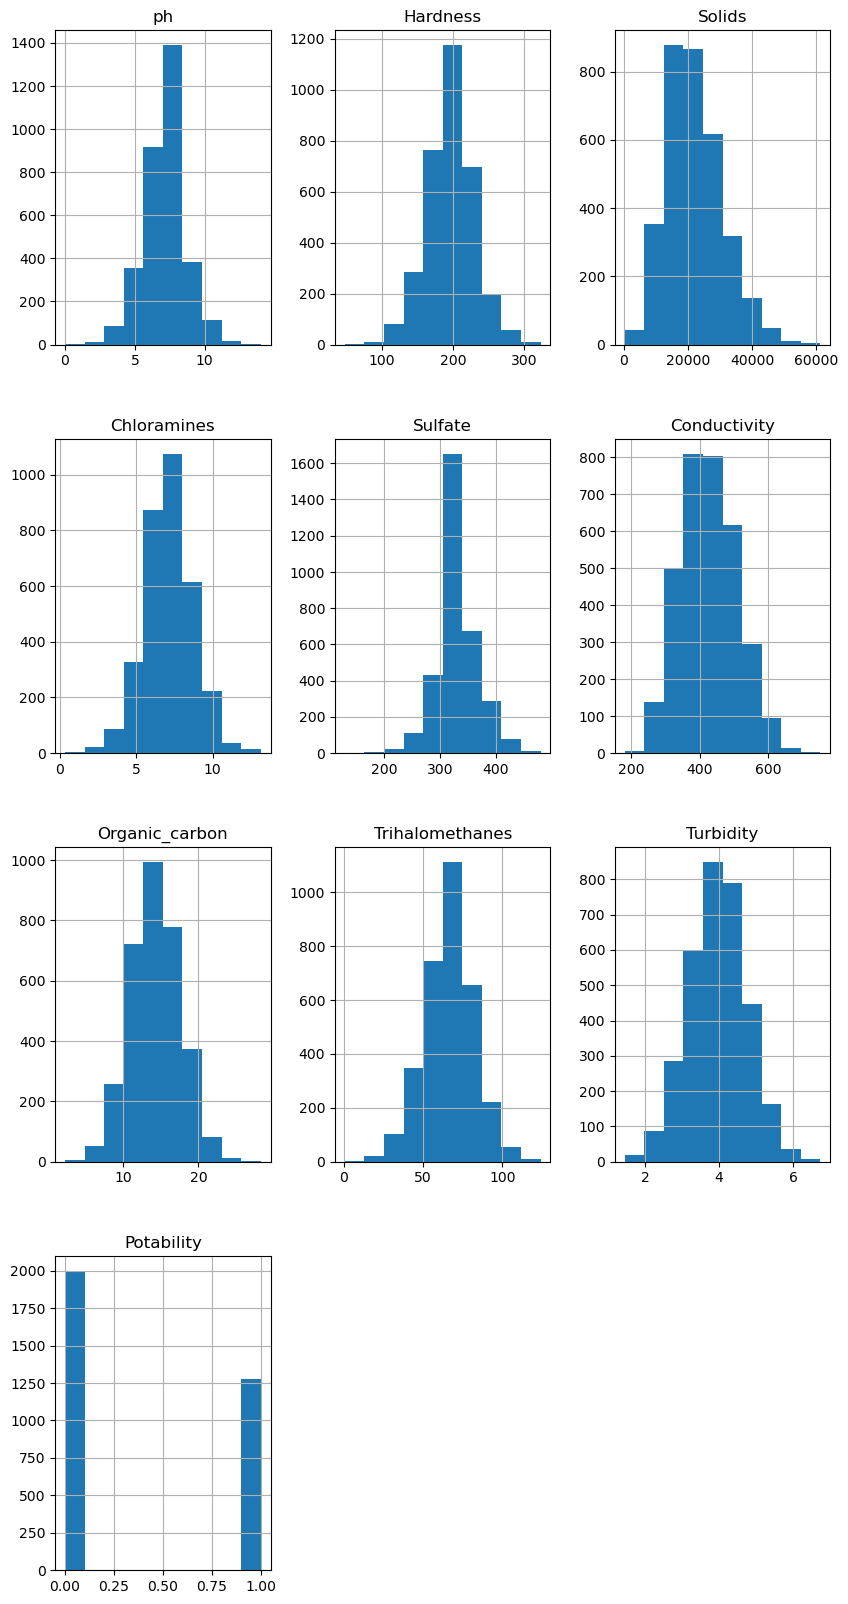

In [65]:
pre_w_df.hist(figsize=(10, 20))

<Axes: >

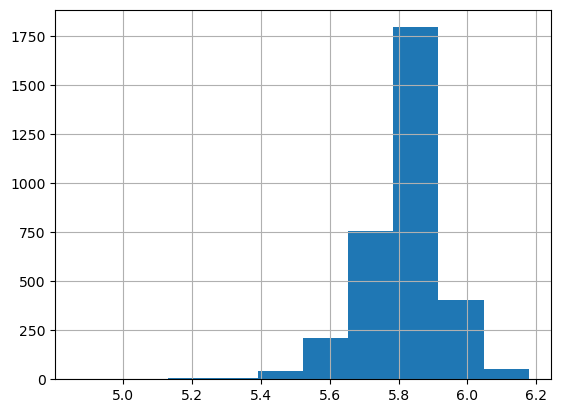

In [66]:
import numpy as np

np.log1p(pre_w_df['Sulfate']).hist()

In [67]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_pre_w = std.fit_transform(pre_w_df.iloc[:, :-1])

In [68]:
pre_w_df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [69]:
std_pre_w_df = pd.DataFrame(std_pre_w, columns=pre_w_df.iloc[:, :-1].columns)
std_pre_w_df['Potability'] = pre_w_df.Potability

std_pre_w_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298,0
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218,0
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365,0
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412,0
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786,0
...,...,...,...,...,...,...,...,...,...,...
3271,-1.637002,-0.081758,2.916188,0.028027,0.728872,1.240155,-0.118075,0.017772,0.601124,1
3272,0.499833,-0.085667,-0.534295,0.593290,-0.014799,-0.417706,1.698560,0.013636,-1.497627,1
3273,1.595654,-0.626829,1.270810,0.144017,-0.014799,0.072263,-0.981329,0.218038,-0.856007,1
3274,-1.324949,1.041355,-1.144058,-0.517373,-0.014799,-0.288597,-0.942064,0.702756,0.950797,1


In [70]:
from sklearn.model_selection import train_test_split

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [71]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [72]:
y_train_over.value_counts()

Potability
0    1598
1    1598
Name: count, dtype: int64

In [73]:
X_train_over.duplicated().sum()

0

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parameters = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=parameters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [10, 20, 30]})

In [75]:
result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 10}",0.524723,12
1,"{'learning_rate': 0.3, 'n_estimators': 20}",0.545999,7
2,"{'learning_rate': 0.3, 'n_estimators': 30}",0.551008,3
3,"{'learning_rate': 0.5, 'n_estimators': 10}",0.538173,11
4,"{'learning_rate': 0.5, 'n_estimators': 20}",0.541618,9
5,"{'learning_rate': 0.5, 'n_estimators': 30}",0.548192,5
6,"{'learning_rate': 0.7, 'n_estimators': 10}",0.546939,6
7,"{'learning_rate': 0.7, 'n_estimators': 20}",0.550382,4
8,"{'learning_rate': 0.7, 'n_estimators': 30}",0.560082,1
9,"{'learning_rate': 1, 'n_estimators': 10}",0.538803,10


In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [77]:
ada = g_ada.best_estimator_
prediction = ada.predict(X_test)

오차 행렬
[[217 183]
 [128 128]]
정확도: 0.5259, 정밀도: 0.4116, 재현율: 0.5000, F1: 0.4515, ROC-AUC: 0.5212
################################################################################


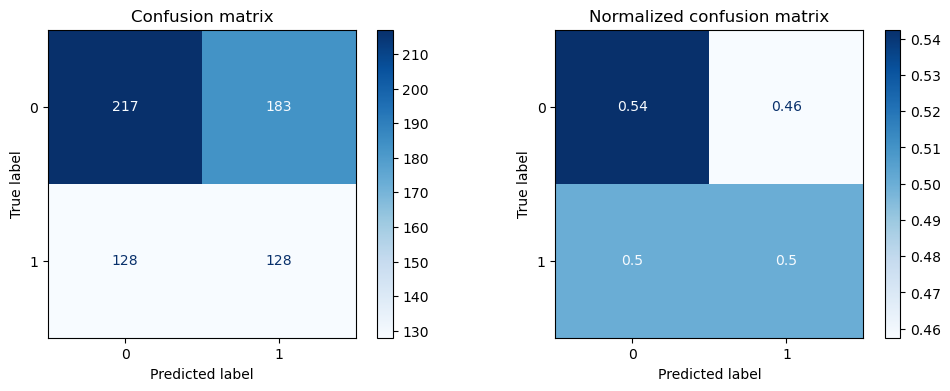

In [78]:
get_evaluation(y_test, prediction, ada, X_test)

#### 1 Cycle
- Positive로 예측하는 예측 성공률이 낮기 때문에, 전체 스케일링을 하고자 한다.

In [79]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline

parameters = {
    'ada__n_estimators': [10, 20, 30],
    'ada__learning_rate': [0.3, 0.5, 0.7, 1]
}

ada_pipe = Pipeline([('min_max_scaler', MinMaxScaler()), ('ada', AdaBoostClassifier())])


g_ada = GridSearchCV(ada_pipe, param_grid=parameters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                                       ('ada', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [0.3, 0.5, 0.7, 1],
                         'ada__n_estimators': [10, 20, 30]})

In [80]:
result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

print(g_ada.cv_results_['params'][8])
display(result_df)

{'ada__learning_rate': 0.7, 'ada__n_estimators': 30}


,params,mean_test_score,rank_test_score
0,"{'ada__learning_rate': 0.3, 'ada__n_estimators...",0.524723,12
1,"{'ada__learning_rate': 0.3, 'ada__n_estimators...",0.545999,7
2,"{'ada__learning_rate': 0.3, 'ada__n_estimators...",0.551008,3
3,"{'ada__learning_rate': 0.5, 'ada__n_estimators...",0.538173,11
4,"{'ada__learning_rate': 0.5, 'ada__n_estimators...",0.541618,9
5,"{'ada__learning_rate': 0.5, 'ada__n_estimators...",0.548192,5
6,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.546939,6
7,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.550382,4
8,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.560082,1
9,"{'ada__learning_rate': 1, 'ada__n_estimators':...",0.538803,10


In [81]:
ada = g_ada.best_estimator_
prediction = ada.predict(X_test)

오차 행렬
[[217 183]
 [128 128]]
정확도: 0.5259, 정밀도: 0.4116, 재현율: 0.5000, F1: 0.4515, ROC-AUC: 0.5212
################################################################################


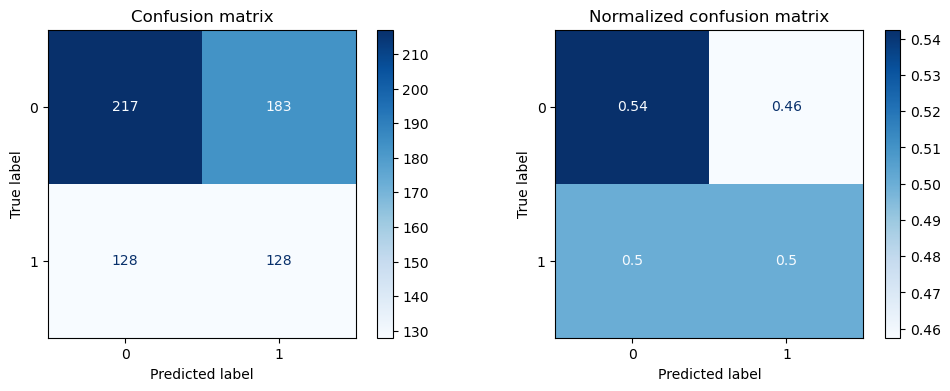

In [82]:
get_evaluation(y_test, prediction, ada, X_test)

#### 2 Cycle
- 변화가 전혀 없기에, 이상치를 제거해보기로 한다.

In [87]:
features = std_pre_w_df.iloc[:, :-1]

for column in features.columns:
    std_pre_w_df.drop(
        std_pre_w_df[~std_pre_w_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
for column in features.columns:
    print(f'{column}: {std_pre_w_df[~std_pre_w_df[column].between(-1.96, 1.96)].shape[0]}건')

ph: 0건
Hardness: 0건
Solids: 0건
Chloramines: 0건
Sulfate: 0건
Conductivity: 0건
Organic_carbon: 0건
Trihalomethanes: 0건
Turbidity: 0건


In [90]:
pre_w_df = pre_w_df.iloc[std_pre_w_df.index].reset_index()

pre_w_df

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
2,5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
4,10,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0
...,...,...,...,...,...,...,...,...,...,...,...
2040,3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2041,3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
2042,3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
2043,3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1


In [91]:
pre_w_df.iloc[:, -1].value_counts()

Potability
0    1288
1     757
Name: count, dtype: int64

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=parameters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]})

In [93]:
result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.556644,12
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.564776,10
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.566969,9
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.561652,11
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.572909,4
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.569471,8
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.572913,3
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.576669,1
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.573851,2
9,"{'learning_rate': 1, 'n_estimators': 50}",0.570094,6


In [94]:
ada = g_ada.best_estimator_
prediction = ada.predict(X_test)

오차 행렬
[[229 171]
 [132 124]]
정확도: 0.5381, 정밀도: 0.4203, 재현율: 0.4844, F1: 0.4501, ROC-AUC: 0.5284
################################################################################


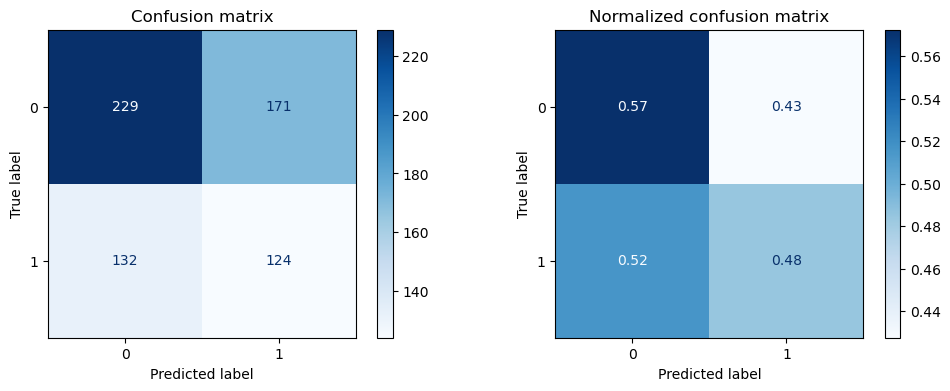

In [95]:
get_evaluation(y_test, prediction, ada, X_test)

#### 부스팅(Boosting) - GBM
**GradientBoostingClassifier(n_estimators, loss, learning_rate, subsample)**

- n_estimators: 약한 학습기의 개수로, 개수가 많을수록 일정 수준까지는 성능이 좋아지지만  
  그만큼 시간도 오래 걸리고 과적합의 위험도 증가한다. 
- loss: 경사 하강법에서 사용할 Loss Function을 지정한다. default는 'log_loss'  
  만약 지수적 감쇠를 사용하고자 한다면, 'exponential'로 기재한다.

<img src='./images/classifier_loss_function01.png'>
<img src='./images/classifier_loss_function02.png'>

- learning_rate: 학습을 진행할 때마다 적용하는 학습률. 0 ~ 1 사이의 값을 가진다.  
  약한 학습기가 순차적으로 오류 값을 보정해나갈 때 적용하는 계수이며, 낮은만큼 최소 손실값을 찾아  
  예측성능이 높아질 수 있지만, 그만큼 많은 수의 트리가 필요하고 시간도 많이 소요된다. default는 1
- subsample: 학습에 사용하는 데이터의 샘플링 비율을 의미한다. default는 1(100%)  
  과적합을 방지하고자 한다면 1보다 작은 값으로 설정한다.

In [96]:
import pandas as pd

s_df = pd.read_csv('./datasets/stress_in_sleep.csv')

s_df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [97]:
s_df.isna().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

array([[<Axes: title={'center': 'sr'}>, <Axes: title={'center': 'rr'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'lm'}>, <Axes: title={'center': 'bo'}>,
        <Axes: title={'center': 'rem'}>],
       [<Axes: title={'center': 'sr.1'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'sl'}>]], dtype=object)

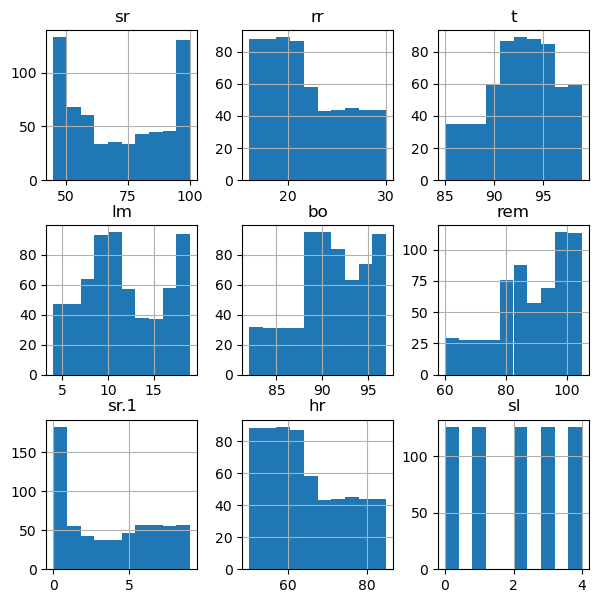

In [100]:
s_df.hist(figsize=(7, 7))

<Axes: >

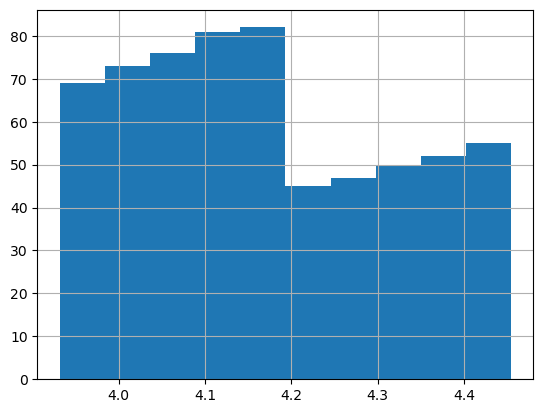

In [107]:
import numpy as np

np.log1p(s_df['hr']).hist()

In [110]:
s_df.corr()['sl'].sort_values(ascending=False).iloc[1:]

sr      0.975322
lm      0.971071
hr      0.963516
rr      0.963516
rem     0.951988
bo     -0.961092
t      -0.962354
sr.1   -0.973036
Name: sl, dtype: float64

In [112]:
s_df.sl.value_counts()

sl
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

In [115]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier

features, targets = s_df.iloc[:, :-1], s_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
                    train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=3)
g_gbc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]})

In [116]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.986111,7
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.988095,2
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.988095,2
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.990079,1
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.988095,2
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.986111,7
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.984127,12
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.986111,7
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.986111,7
9,"{'learning_rate': 1, 'n_estimators': 50}",0.988095,2


In [117]:
gbc = g_gbc.best_estimator_
prediction = gbc.predict(X_test)

In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[23  2  0  0  0]
 [ 0 25  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  1 24  0]
 [ 0  0  0  0 26]]
정확도: 0.9762, 정밀도: 0.9775, 재현율: 0.9760, F1: 0.9760
################################################################################


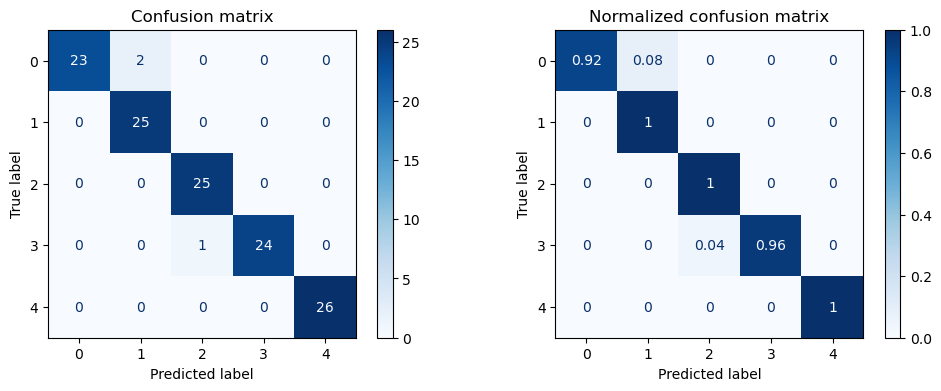

In [119]:
get_evaluation(y_test, prediction, gbc, X_test)

#### 부스팅(Boosting) - XGBoost
**XGBClassifier(n_estimators, learning_rate, subsample, eval_set, early_stopping_rounds)**

- eval_set: 예측 오류값을 줄일 수 있도록 반복하면서 학습이 진행되는데,  
  이 때 학습은 학습 데이터로 하고, 예측 오류값 평가는 eval_set으로 지정된 검증 세트로 평가한다.
- early_stopping_rounds: 지정 횟수동안 오류가 개선되지 않으면 더 이상 학습을 진행하지 않는다.

In [1]:
import xgboost

print(xgboost.__version__)

2.0.3


In [2]:
import pandas as pd

o_df = pd.read_csv('./datasets/orange.csv')

o_df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [5]:
# 각 컬럼의 결측치 여부를 T/F 향태로 출력
o_df.isna().any()

Size (cm)             False
Weight (g)            False
Brix (Sweetness)      False
pH (Acidity)          False
Softness (1-5)        False
HarvestTime (days)    False
Ripeness (1-5)        False
Color                 False
Variety               False
Blemishes (Y/N)       False
Quality (1-5)         False
dtype: bool

In [7]:
pre_o_df = o_df.copy()

In [8]:
pre_o_df['Blemishes (Y/N)'] = pre_o_df['Blemishes (Y/N)'].apply(lambda x: x.split(' ')[0])

pre_o_df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y,4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y,3.0


In [9]:
pre_o_df['Blemishes (Y/N)'].value_counts()

Blemishes (Y/N)
N    151
Y     90
Name: count, dtype: int64

In [10]:
pre_o_df['Color'].value_counts()

Color
Deep Orange      75
Light Orange     64
Orange-Red       55
Orange           38
Yellow-Orange     9
Name: count, dtype: int64

In [11]:
pre_o_df['Variety'].value_counts()

Variety
Cara Cara                21
Temple                   18
Star Ruby                18
Navel                    16
Moro (Blood)             16
Tangerine                14
Clementine               14
Washington Navel         14
Satsuma Mandarin         13
Ortanique (Hybrid)       13
Minneola (Hybrid)        12
Jaffa                    11
Ambiance                 11
Valencia                 11
California Valencia       7
Honey Tangerine           7
Hamlin                    5
Midsweet (Hybrid)         5
Clementine (Seedless)     4
Murcott (Hybrid)          3
Navel (Late Season)       3
Blood Orange              2
Navel (Early Season)      2
Tangelo (Hybrid)          1
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

columns = ['Color',	'Variety',	'Blemishes (Y/N)',	'Quality (1-5)']
encoders = {}

for column in columns:
    encoder = LabelEncoder()
    pre_o_df[column] = encoder.fit_transform(pre_o_df[column].tolist())
    encoders[column] = encoder.classes_.tolist()

encoders

{'Color': ['Deep Orange',
  'Light Orange',
  'Orange',
  'Orange-Red',
  'Yellow-Orange'],
 'Variety': ['Ambiance',
  'Blood Orange',
  'California Valencia',
  'Cara Cara',
  'Clementine',
  'Clementine (Seedless)',
  'Hamlin',
  'Honey Tangerine',
  'Jaffa',
  'Midsweet (Hybrid)',
  'Minneola (Hybrid)',
  'Moro (Blood)',
  'Murcott (Hybrid)',
  'Navel',
  'Navel (Early Season)',
  'Navel (Late Season)',
  'Ortanique (Hybrid)',
  'Satsuma Mandarin',
  'Star Ruby',
  'Tangelo (Hybrid)',
  'Tangerine',
  'Temple',
  'Valencia',
  'Washington Navel'],
 'Blemishes (Y/N)': ['N', 'Y'],
 'Quality (1-5)': [1.0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]}

In [13]:
pre_o_df['Quality (1-5)'].value_counts()

Quality (1-5)
5    76
7    52
6    29
3    26
4    23
1    14
2    12
0     9
Name: count, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = pre_o_df.iloc[:, :-1], pre_o_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
                    train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
                    train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

y_train_over.value_counts()

Quality (1-5)
7    61
5    61
4    61
0    61
3    61
6    61
1    61
2    61
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb,
                    param_grid=parameters,
                    cv=5,
                    refit=True,
                    return_train_score=True,
                    n_jobs=-1)

g_xgb.fit(X_train, y_train, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-mlogloss:1.12488	validation_1-mlogloss:1.09854
[1]	validation_0-mlogloss:0.75759	validation_1-mlogloss:0.69065
[2]	validation_0-mlogloss:0.55503	validation_1-mlogloss:0.48202
[3]	validation_0-mlogloss:0.38837	validation_1-mlogloss:0.34827
[4]	validation_0-mlogloss:0.28998	validation_1-mlogloss:0.27267
[5]	validation_0-mlogloss:0.22545	validation_1-mlogloss:0.21690
[6]	validation_0-mlogloss:0.18090	validation_1-mlogloss:0.17393
[7]	validation_0-mlogloss:0.15273	validation_1-mlogloss:0.14615
[8]	validation_0-mlogloss:0.12891	validation_1-mlogloss:0.13002
[9]	validation_0-mlogloss:0.11247	validation_1-mlogloss:0.10897
[10]	validation_0-mlogloss:0.10097	validation_1-mlogloss:0.10148
[11]	validation_0-mlogloss:0.09211	validation_1-mlogloss:0.09405
[12]	validation_0-mlogloss:0.08562	validation_1-mlogloss:0.08640
[13]	validation_0-mlogloss:0.07967	validation_1-mlogloss:0.08167
[14]	validation_0-mlogloss:0.07503	validation_1-mlogloss:0.07782
[15]	validation_0-mlogloss:0.06997	

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-mlogloss:0.03942	validation_1-mlogloss:0.04351
[40]	validation_0-mlogloss:0.03913	validation_1-mlogloss:0.04251
[41]	validation_0-mlogloss:0.03870	validation_1-mlogloss:0.04243
[42]	validation_0-mlogloss:0.03831	validation_1-mlogloss:0.04199
[43]	validation_0-mlogloss:0.03803	validation_1-mlogloss:0.04157
[44]	validation_0-mlogloss:0.03765	validation_1-mlogloss:0.04125
[45]	validation_0-mlogloss:0.03724	validation_1-mlogloss:0.04133
[46]	validation_0-mlogloss:0.03687	validation_1-mlogloss:0.04103
[47]	validation_0-mlogloss:0.03658	validation_1-mlogloss:0.04099
[48]	validation_0-mlogloss:0.03630	validation_1-mlogloss:0.04053
[49]	validation_0-mlogloss:0.03595	validation_1-mlogloss:0.04030


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True)

In [19]:
result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.458435,11
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.458435,11
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.463563,10
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.494602,7
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.494602,7
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.494602,7
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.515250,1
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.510121,2
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.510121,2
9,"{'learning_rate': 1, 'n_estimators': 50}",0.499325,4


In [20]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

features, targets = pre_o_df.iloc[:, :-1], pre_o_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
                    train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

parameters = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf']
}

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', SVC(probability=True))])

g_svc = GridSearchCV(svc_pipe, param_grid=parameters, cv=5, refit=True, return_train_score=True)
g_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [21]:
result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.01, 'svc__gamma': 0.001, 'svc__ke...",0.416464,36
1,"{'svc__C': 0.01, 'svc__gamma': 0.001, 'svc__ke...",0.317679,46
2,"{'svc__C': 0.01, 'svc__gamma': 0.01, 'svc__ker...",0.416464,36
3,"{'svc__C': 0.01, 'svc__gamma': 0.01, 'svc__ker...",0.317679,46
4,"{'svc__C': 0.01, 'svc__gamma': 0.1, 'svc__kern...",0.416464,36
5,"{'svc__C': 0.01, 'svc__gamma': 0.1, 'svc__kern...",0.317679,46
6,"{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...",0.416464,36
7,"{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...",0.317679,46
8,"{'svc__C': 0.01, 'svc__gamma': 10, 'svc__kerne...",0.416464,36
9,"{'svc__C': 0.01, 'svc__gamma': 10, 'svc__kerne...",0.317679,46


In [23]:
xgb = g_xgb.best_estimator_
prediction = xgb.predict(X_test)

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[ 0  0  1  0  0  1  0  0]
 [ 0  1  0  1  1  0  0  0]
 [ 0  0  0  1  0  1  0  0]
 [ 0  2  0  2  0  1  0  0]
 [ 0  1  0  2  1  1  0  0]
 [ 0  0  0  2  1 11  0  1]
 [ 0  0  0  1  0  0  5  0]
 [ 0  0  0  0  0  1  1  9]]
정확도: 0.5918, 정밀도: 0.4033, 재현율: 0.4148, F1: 0.4027
################################################################################


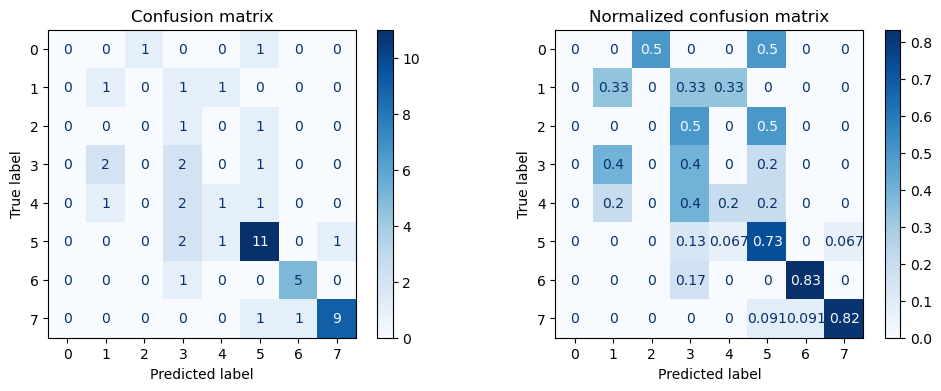

In [25]:
get_evaluation(y_test, prediction, xgb, X_test)

#### 부스팅(Boosting) - LightGBM(Light Gradient Boosting Machine)
**LGBMClassifier(n_estimators, learning_rate, subsample, early_stopping_rounds, eval_set)**

- n_estimators: 기능은 GBM과 똑같지만, default가 100이다.

In [56]:
import pandas as pd

h_df = pd.read_csv('./datasets/hotel.csv')

h_df

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-17


In [57]:
pre_h_df = h_df.drop(labels=[
    'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
    'arrival_date_day_of_month', 'deposit_type', 'meal', 'index', 'country',
    'company', 'is_canceled', 'reservation_status_date', 'market_segment',
    'distribution_channel'], axis=1)

pre_h_df

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,342,0,0,2,0.0,0,0,0,0,C,C,3,NaN,0,Transient,0.00,0,0,Check-Out
1,Resort Hotel,737,0,0,2,0.0,0,0,0,0,C,C,4,NaN,0,Transient,0.00,0,0,Check-Out
2,Resort Hotel,7,0,1,1,0.0,0,0,0,0,A,C,0,NaN,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,13,0,1,1,0.0,0,0,0,0,A,A,0,304.0,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,14,0,2,2,0.0,0,0,0,0,A,A,0,240.0,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,2,5,2,0.0,0,0,0,0,A,A,0,394.0,0,Transient,96.14,0,0,Check-Out
119386,City Hotel,102,2,5,3,0.0,0,0,0,0,E,E,0,9.0,0,Transient,225.43,0,2,Check-Out
119387,City Hotel,34,2,5,2,0.0,0,0,0,0,D,D,0,9.0,0,Transient,157.71,0,4,Check-Out
119388,City Hotel,109,2,5,2,0.0,0,0,0,0,A,A,0,89.0,0,Transient,104.40,0,0,Check-Out


In [58]:
pre_h_df.isna().sum()

hotel                                 0
lead_time                             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
agent                             16340
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
dtype: int64

In [59]:
# 컬럼 별 데이터 분포를 출력해보면서 제거할 걸럼 색출
h_df['agent'].value_counts()

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64

In [60]:
# 컬럼 별 결측치 개수를 출력해보면서 제거할 컬럼 색출
h_df['days_in_waiting_list'].isna().sum()

0

In [61]:
pre_h_df = pre_h_df[~ pre_h_df['agent'].isna()].reset_index(drop=True)

pre_h_df

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,13,0,1,1,0.0,0,0,0,0,A,A,0,304.0,0,Transient,75.00,0,0,Check-Out
1,Resort Hotel,14,0,2,2,0.0,0,0,0,0,A,A,0,240.0,0,Transient,98.00,0,1,Check-Out
2,Resort Hotel,14,0,2,2,0.0,0,0,0,0,A,A,0,240.0,0,Transient,98.00,0,1,Check-Out
3,Resort Hotel,9,0,2,2,0.0,0,0,0,0,C,C,0,303.0,0,Transient,103.00,0,1,Check-Out
4,Resort Hotel,85,0,3,2,0.0,0,0,0,0,A,A,0,240.0,0,Transient,82.00,0,1,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103045,City Hotel,23,2,5,2,0.0,0,0,0,0,A,A,0,394.0,0,Transient,96.14,0,0,Check-Out
103046,City Hotel,102,2,5,3,0.0,0,0,0,0,E,E,0,9.0,0,Transient,225.43,0,2,Check-Out
103047,City Hotel,34,2,5,2,0.0,0,0,0,0,D,D,0,9.0,0,Transient,157.71,0,4,Check-Out
103048,City Hotel,109,2,5,2,0.0,0,0,0,0,A,A,0,89.0,0,Transient,104.40,0,0,Check-Out


In [62]:
pre_h_df['children'] = pre_h_df['children'].fillna(0)

In [63]:
pre_h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103050 entries, 0 to 103049
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           103050 non-null  object 
 1   lead_time                       103050 non-null  int64  
 2   stays_in_weekend_nights         103050 non-null  int64  
 3   stays_in_week_nights            103050 non-null  int64  
 4   adults                          103050 non-null  int64  
 5   children                        103050 non-null  float64
 6   babies                          103050 non-null  int64  
 7   is_repeated_guest               103050 non-null  int64  
 8   previous_cancellations          103050 non-null  int64  
 9   previous_bookings_not_canceled  103050 non-null  int64  
 10  reserved_room_type              103050 non-null  object 
 11  assigned_room_type              103050 non-null  object 
 12  booking_changes 

In [64]:
pre_h_df['customer_type'] = pre_h_df['customer_type'].astype('category')
pre_h_df['reservation_status'] = pre_h_df['reservation_status'].astype('category')
pre_h_df['hotel'] = pre_h_df['hotel'].astype('category')
pre_h_df['reserved_room_type'] = pre_h_df['reserved_room_type'].astype('category')

In [65]:
pre_h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103050 entries, 0 to 103049
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           103050 non-null  category
 1   lead_time                       103050 non-null  int64   
 2   stays_in_weekend_nights         103050 non-null  int64   
 3   stays_in_week_nights            103050 non-null  int64   
 4   adults                          103050 non-null  int64   
 5   children                        103050 non-null  float64 
 6   babies                          103050 non-null  int64   
 7   is_repeated_guest               103050 non-null  int64   
 8   previous_cancellations          103050 non-null  int64   
 9   previous_bookings_not_canceled  103050 non-null  int64   
 10  reserved_room_type              103050 non-null  category
 11  assigned_room_type              103050 non-null  object  
 12  bo

In [66]:
pre_h_df.reservation_status.value_counts()

reservation_status
Check-Out    62856
Canceled     39191
No-Show       1003
Name: count, dtype: int64

array([[<Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'stays_in_weekend_nights'}>,
        <Axes: title={'center': 'stays_in_week_nights'}>,
        <Axes: title={'center': 'adults'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'babies'}>,
        <Axes: title={'center': 'is_repeated_guest'}>,
        <Axes: title={'center': 'previous_cancellations'}>],
       [<Axes: title={'center': 'previous_bookings_not_canceled'}>,
        <Axes: title={'center': 'booking_changes'}>,
        <Axes: title={'center': 'agent'}>,
        <Axes: title={'center': 'days_in_waiting_list'}>],
       [<Axes: title={'center': 'adr'}>,
        <Axes: title={'center': 'required_car_parking_spaces'}>,
        <Axes: title={'center': 'total_of_special_requests'}>, <Axes: >]],
      dtype=object)

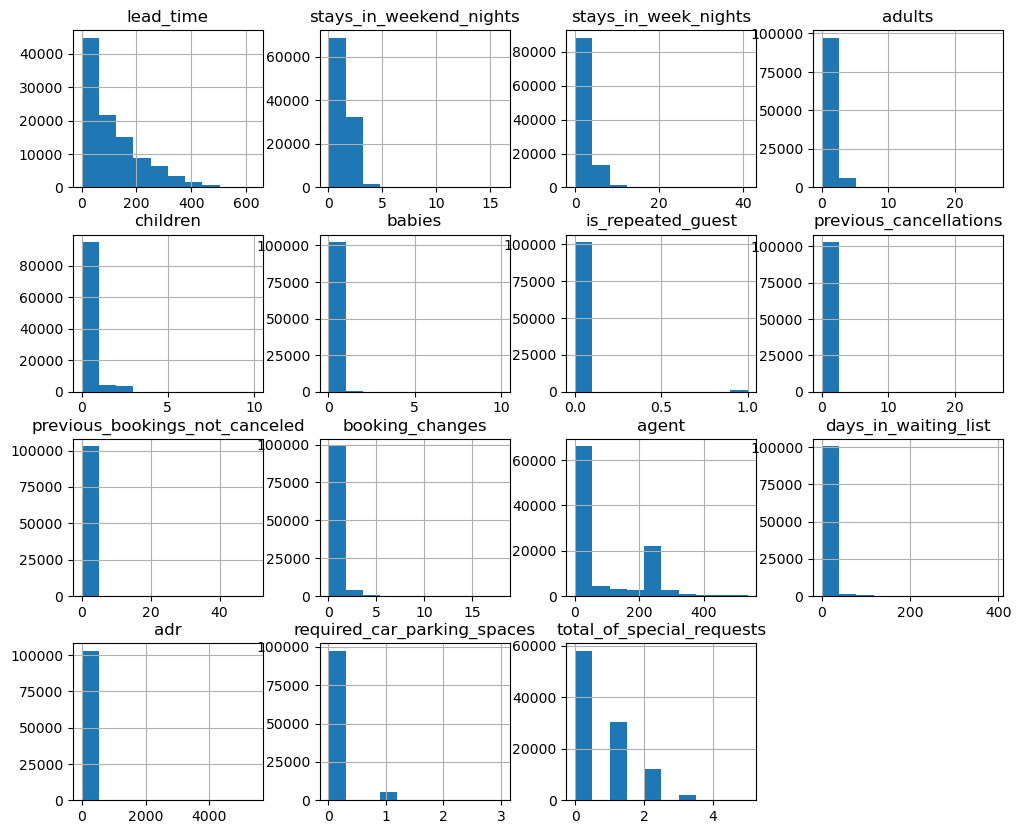

In [71]:
pre_h_df.hist(figsize=(12, 10))

In [76]:
from sklearn.preprocessing import LabelEncoder

columns = ['hotel', 'customer_type', 'reservation_status', 'reserved_room_type', 'assigned_room_type']
encoders = {}

for column in columns:
    encoder = LabelEncoder()
    pre_h_df[column] = encoder.fit_transform(pre_h_df[column].tolist())
    encoders[column] = encoder.classes_.tolist()

encoder

LabelEncoder()

In [86]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

parameters = {
    'max_depth': [1, 2, 3],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

X_train, X_test, y_train, y_test = \
                train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
                train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, cv=3, refit=True, return_train_score=True)
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1236
[LightGBM] [Info] Number of data points in the train set: 100570, number of used features: 19
[LightGBM] [Info] Start training from score -1.098622
[LightGBM] [Info] Start training from score -1.098622
[LightGBM] [Info] Start training from score -1.098592
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1234
[LightGBM] [Info] Number of data points in the train set: 100570, number of used features: 19
[LightGBM] [Info] Start training from score -1.098622
[LightGBM] [Info] Start training from score -1.098592
[LightGBM] [Info] Star

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'max_depth': [1, 2, 3]},
             return_train_score=True)

In [87]:
result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'max_depth': 1}",0.688343,12
1,"{'learning_rate': 0.3, 'max_depth': 2}",0.741851,8
2,"{'learning_rate': 0.3, 'max_depth': 3}",0.780763,5
3,"{'learning_rate': 0.5, 'max_depth': 1}",0.705141,11
4,"{'learning_rate': 0.5, 'max_depth': 2}",0.761944,7
5,"{'learning_rate': 0.5, 'max_depth': 3}",0.802585,3
6,"{'learning_rate': 0.7, 'max_depth': 1}",0.712088,10
7,"{'learning_rate': 0.7, 'max_depth': 2}",0.776958,6
8,"{'learning_rate': 0.7, 'max_depth': 3}",0.812787,2
9,"{'learning_rate': 1, 'max_depth': 1}",0.718677,9


In [88]:
lgbm = g_lgbm.best_estimator_
prediction = lgbm.predict(X_test)

오차 행렬
[[ 6084  1502   252]
 [ 1800 10080   691]
 [   33    98    70]]
정확도: 0.7877, 정밀도: 0.5669, 재현율: 0.6421, F1: 0.5730
################################################################################


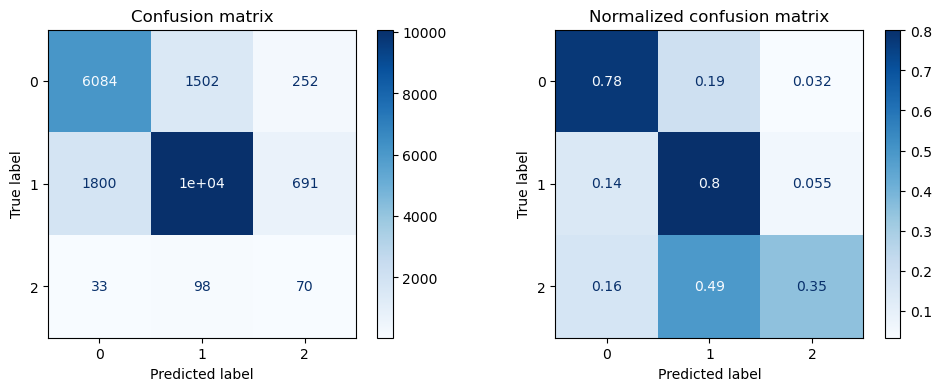

In [89]:
get_evaluation(y_test, prediction, lgbm, X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

parameters = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf']
}

X_train, X_test, y_train, y_test = \
                train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
                train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', SVC(probability=True))])

g_svc = GridSearchCV(svc_pipe, param_grid=parameters, cv=3, refit=True, return_train_score=True)
g_svc.fit(X_train_over, y_train_over)

In [ ]:
result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

In [ ]:
svc = g_svc.best_estimator_
prediction = svc.predict(X_test)

In [ ]:
get_evaluation(y_test, prediction, svc, X_test)